# ***EDA***






> **Imports**






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"


# **Data loading , Reading and exploring**




In [ ]:
df=pd.read_csv("/content/WHO-COVID-19-global-daily-data.csv")
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,NE,Niger,AFR,NaN,0,NaN,0
1,2020-01-04,NO,Norway,EUR,NaN,0,NaN,0
2,2020-01-04,PW,Palau,WPR,0.0,0,0.0,0
3,2020-01-04,PY,Paraguay,AMR,NaN,0,NaN,0
4,2020-01-04,PN,Pitcairn,WPR,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...
487675,2025-07-27,BA,Bosnia and Herzegovina,EUR,NaN,404287,NaN,16406
487676,2025-07-27,CA,Canada,AMR,NaN,4819055,NaN,55282
487677,2025-07-27,BT,Bhutan,SEAR,NaN,63075,NaN,21
487678,2025-07-27,AZ,Azerbaijan,EUR,NaN,836510,NaN,10353


In [ ]:
df.shape

(487680, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487680 entries, 0 to 487679
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      487680 non-null  object 
 1   Country_code       485648 non-null  object 
 2   Country            487680 non-null  object 
 3   WHO_region         487680 non-null  object 
 4   New_cases          210274 non-null  float64
 5   Cumulative_cases   487680 non-null  int64  
 6   New_deaths         153909 non-null  float64
 7   Cumulative_deaths  487680 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 29.8+ MB


In [ ]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.102740e+05,4.876800e+05,153909.000000,4.876800e+05
mean,3.702112e+03,2.040467e+06,46.127095,2.164831e+04
std,4.857198e+04,8.511593e+06,242.408071,8.673084e+04
min,-6.507900e+04,0.000000e+00,-3520.000000,0.000000e+00
25%,3.000000e+00,6.589000e+03,0.000000,4.000000e+01
50%,6.100000e+01,5.900850e+04,2.000000,6.900000e+02
75%,6.770000e+02,6.608540e+05,15.000000,7.924000e+03
max,6.966046e+06,1.034368e+08,44047.000000,1.225927e+06


In [ ]:
df.describe(exclude="number")

,Date_reported,Country_code,Country,WHO_region
count,487680,485648,487680,487680
unique,2032,239,240,7
top,2025-07-11,NE,Niger,EUR
freq,240,2032,2032,125984


<Axes: title={'center': 'Unique values per feature'}>

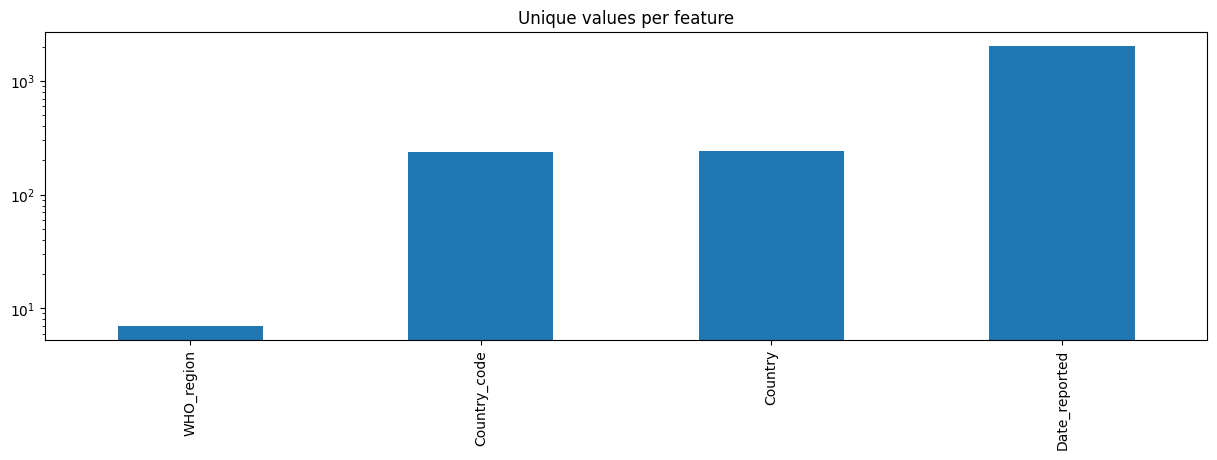

In [ ]:
unique_values = df.select_dtypes(include="object").nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")


In [ ]:
df.nunique()

,0
Date_reported,2032
Country_code,239
Country,240
WHO_region,7
New_cases,18355
Cumulative_cases,128572
New_deaths,1900
Cumulative_deaths,40993




# **Data Cleaning**



In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Date_reported,0
Country_code,2032
Country,0
WHO_region,0
New_cases,277406
Cumulative_cases,0
New_deaths,333771
Cumulative_deaths,0


In [ ]:
df['Cumulative_cases'].dropna(inplace=True)


In [ ]:
df['WHO_region'].dropna(inplace=True)
df['Cumulative_deaths'].dropna(inplace=True)

In [ ]:
df.isna().mean().sort_values(ascending=False) * 100

,0
New_deaths,68.440576
New_cases,56.882792
Country_code,0.416667
Date_reported,0.000000
WHO_region,0.000000
Country,0.000000
Cumulative_cases,0.000000
Cumulative_deaths,0.000000


In [ ]:
df.isna().corr()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country_code,NaN,1.000000,NaN,NaN,-0.001791,NaN,0.006047,NaN
Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WHO_region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New_cases,NaN,-0.001791,NaN,NaN,1.000000,NaN,0.770785,NaN
Cumulative_cases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New_deaths,NaN,0.006047,NaN,NaN,0.770785,NaN,1.000000,NaN
Cumulative_deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


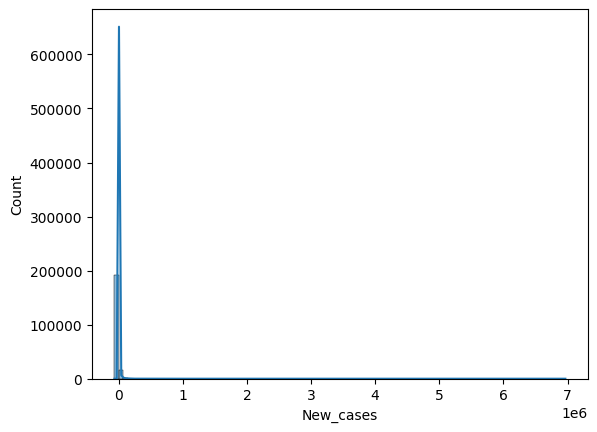

In [ ]:
sns.histplot(df['New_cases'], bins = 100,kde=True)
plt.show()



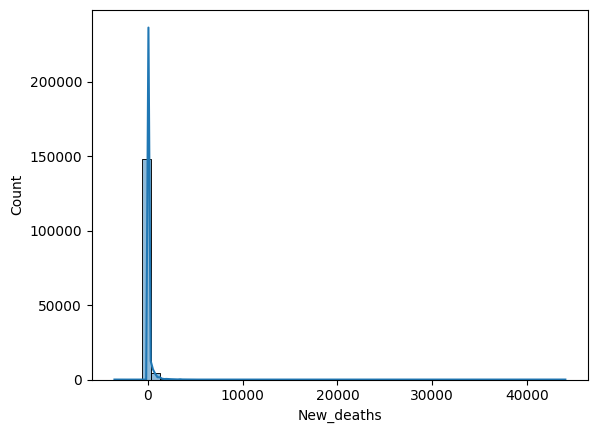

In [ ]:
sns.histplot(df['New_deaths'], bins=50, kde=True)
plt.show()

In [ ]:
df['New_cases'].skew(skipna=True)



np.float64(82.56551508618065)

In [ ]:
df['New_deaths'].skew(skipna=True)

np.float64(47.53373509213423)

In [ ]:

df['New_cases'].fillna(df['New_cases'].median(), inplace=True)
df['New_deaths'].fillna(df['New_deaths'].median(), inplace=True)
df['Country_code'].fillna(df['Country_code'].mode()[0], inplace=True)


/tmp/ipython-input-1277461193.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-1277461193.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

In [ ]:
print(df['New_cases'].isnull().sum(),
      df['New_deaths'].isnull().sum() ,
      df['Country_code'].isnull().sum())

0 0 0


In [ ]:

df["Date_reported"] = pd.to_datetime(df["Date_reported"], errors="coerce", format="mixed")


In [ ]:
for i in df.columns:
  uniquecol=df[i].unique()
  print(f"{i} : {uniquecol}\n**************************************************************")


Date_reported : <DatetimeArray>
['2020-01-04 00:00:00', '2020-01-05 00:00:00', '2020-01-06 00:00:00',
 '2020-01-07 00:00:00', '2020-01-08 00:00:00', '2020-01-09 00:00:00',
 '2020-01-10 00:00:00', '2020-01-11 00:00:00', '2020-01-12 00:00:00',
 '2020-01-13 00:00:00',
 ...
 '2025-07-18 00:00:00', '2025-07-19 00:00:00', '2025-07-20 00:00:00',
 '2025-07-21 00:00:00', '2025-07-22 00:00:00', '2025-07-23 00:00:00',
 '2025-07-24 00:00:00', '2025-07-25 00:00:00', '2025-07-26 00:00:00',
 '2025-07-27 00:00:00']
Length: 2032, dtype: datetime64[ns]
**************************************************************
Country_code : ['NE' 'NO' 'PW' 'PY' 'PN' 'SH' 'SM' 'RS' 'ZA' 'ES' 'TH' 'VU' 'VE' 'AI'
 'AZ' 'BT' 'BA' 'CA' 'KY' 'XL' 'KM' 'ET' 'XF' 'GA' 'GL' 'HN' 'IN' 'JO'
 'XK' 'LV' 'LS' 'MY' 'DZ' 'AD' 'AM' 'AT' 'BW' 'BN' 'BG' 'BI' 'KH' 'CG'
 'CY' 'CD' 'ER' 'SZ' 'PF' 'GH' 'IL' 'JP' 'JE' 'NG' 'MP' 'PL' 'PT' 'RE'
 'LC' 'ST' 'SC' 'TT' 'TN' 'UA' 'US' 'UY' 'YE' 'ZW' 'AL' 'AW' 'BS' 'BH'
 'BD' 'BR' 'CM' 'CL' 'CK' 

In [ ]:
# df['Cumulative_deaths']=df['Cumulative_deaths'].astype('int64')

In [ ]:
# df['Cumulative_cases']=df['Cumulative_cases'].astype('int64')

In [ ]:
# df['New_cases']=df['New_cases'].astype('int64')

In [ ]:
# df['New_deaths']=df['New_deaths'].astype('int64')

# **Univariate Analysis**

In [ ]:
def univariate_summary(df):
    summary = df.describe(include='all').T
    summary['missing'] = df.isnull().sum()
    return summary

univariate_summary(df)

,count,unique,top,freq,mean,min,25%,50%,75%,max,std,missing
Date_reported,487680,NaN,NaN,NaN,2022-10-15 12:00:00,2020-01-04 00:00:00,2021-05-25 18:00:00,2022-10-15 12:00:00,2024-03-06 06:00:00,2025-07-27 00:00:00,NaN,0
Country_code,487680,239,AD,4064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Country,487680,240,Niger,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
WHO_region,487680,7,EUR,125984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
New_cases,487680.0,NaN,NaN,NaN,1630.945731,-65079.0,61.0,61.0,61.0,6966046.0,31945.046824,0
Cumulative_cases,487680.0,NaN,NaN,NaN,2040467.499859,0.0,6589.0,59008.5,660854.0,103436829.0,8511592.859829,0
New_deaths,487680.0,NaN,NaN,NaN,15.926257,-3520.0,2.0,2.0,2.0,44047.0,137.714737,0
Cumulative_deaths,487680.0,NaN,NaN,NaN,21648.310146,0.0,40.0,690.0,7924.0,1225927.0,86730.839365,0




> Numerical Features




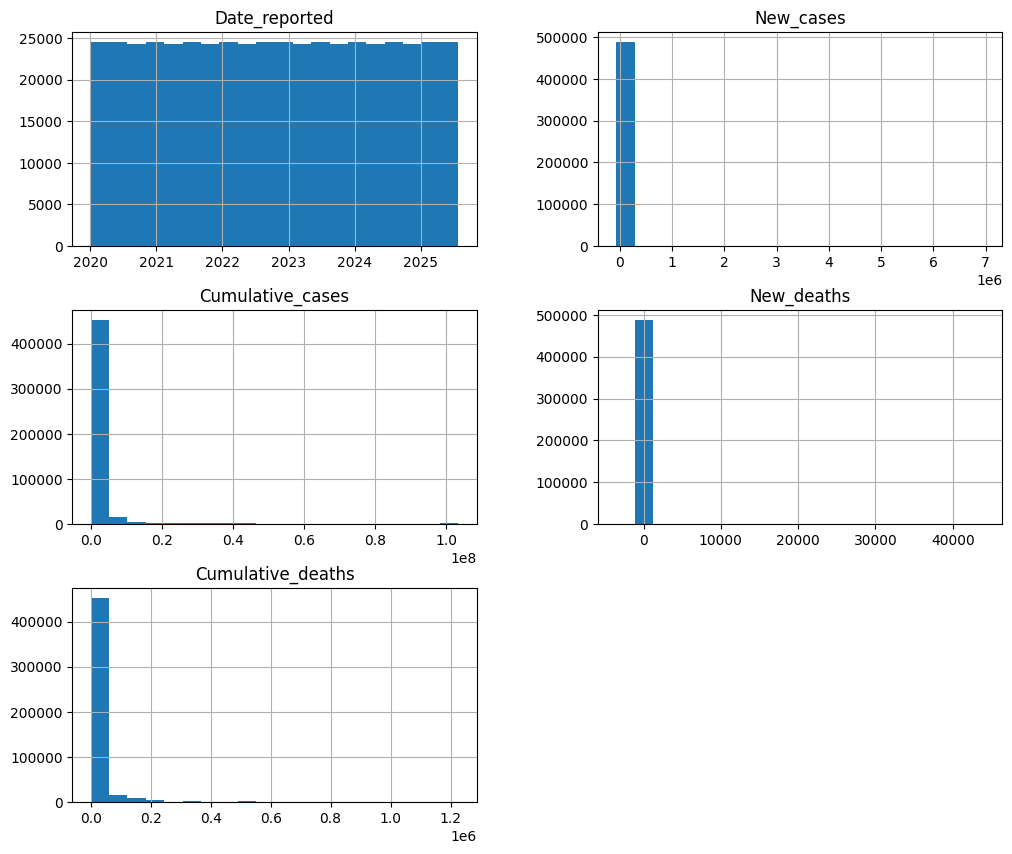

In [ ]:
df.hist(figsize=(12,10), bins=20)
plt.show()


In [ ]:
sns.pairplot(df, diag_kind="kde")



> Cat Features



In [ ]:
df.info()

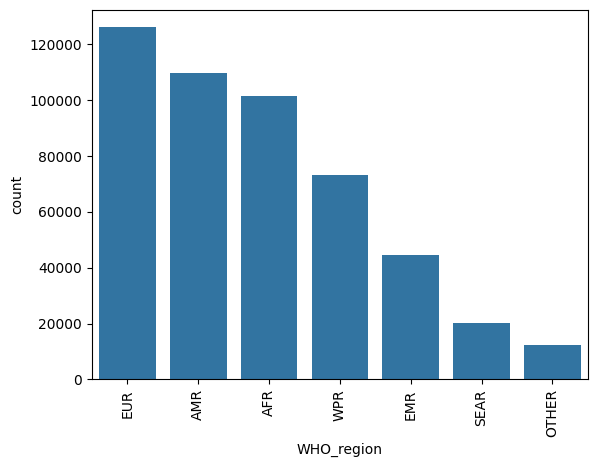

In [ ]:
sns.countplot(x="WHO_region", data=df, order=df["WHO_region"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

# **Outliers Detection**

In [ ]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='New_cases', data=df)
plt.subplot(2, 2, 2)
sns.boxplot(x='New_deaths', data=df)
plt.subplot(2, 2, 3)
sns.boxplot(x='Cumulative_cases', data=df)
plt.subplot(2, 2, 4)
sns.boxplot(x='Cumulative_deaths', data=df)


plt.show()





>  new_cases



In [ ]:
df['New_cases'] = np.clip(df['New_cases'], df['New_cases'].quantile(0.01),
                                            df['New_cases'].quantile(0.99))

In [ ]:
#IQR for  new_cases
Q1 = df['New_cases'].quantile(0.25)
Q3 = df['New_cases'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)

In [ ]:
df['New_cases'].value_counts().head(10)

In [ ]:
df['New_cases']=np.log1p(df['New_cases'])

In [ ]:
sns.boxplot(x='New_cases', data=df)




>  new_deaths



In [ ]:
Q1 = df['New_deaths'].quantile(0.25)
Q3 = df['New_deaths'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)

In [ ]:

df['New_deaths']=np.log1p(df['New_deaths'])

In [ ]:
sns.boxplot(x='New_deaths', data=df)
plt.show()



> Cumulative_cases



In [ ]:
df['Cumulative_cases']=np.log1p(df['Cumulative_cases'])

In [ ]:
sns.boxplot(x='Cumulative_cases', data=df)
plt.show()

In [ ]:
Q1 = df['Cumulative_cases'].quantile(0.25)
Q3 = df['Cumulative_cases'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)

In [ ]:
lowebpound=Q1-1.5*IQR
upperebound=Q3+1.5*IQR
print(lowebpound,upperebound)

In [ ]:
outliers = df[(df['Cumulative_cases'] < lowebpound) | (df['Cumulative_cases'] > upperebound)]
outliers

In [ ]:
df=df.drop(df[df['Cumulative_cases'] < lowebpound].index)
df=df.drop(df[df['Cumulative_cases'] > upperebound].index)

In [ ]:
sns.boxplot(x='Cumulative_cases', data=df)
plt.show()



> Cumulative_deaths



In [ ]:
df['Cumulative_deaths']=np.log1p(df['Cumulative_deaths'])

In [ ]:
sns.boxplot(x='Cumulative_deaths', data=df)
plt.show()

# **Bivariate Analysis and Multivariate Analysis**





In [ ]:
df["New_cases"] = df["New_cases"].astype('int64')
df["New_deaths"] = df["New_deaths"].replace([np.inf, -np.inf], np.nan)
df["New_deaths"] = df["New_deaths"].fillna(0).astype("int64")

In [ ]:
df.info()

<Figure size 2000x1500 with 0 Axes>

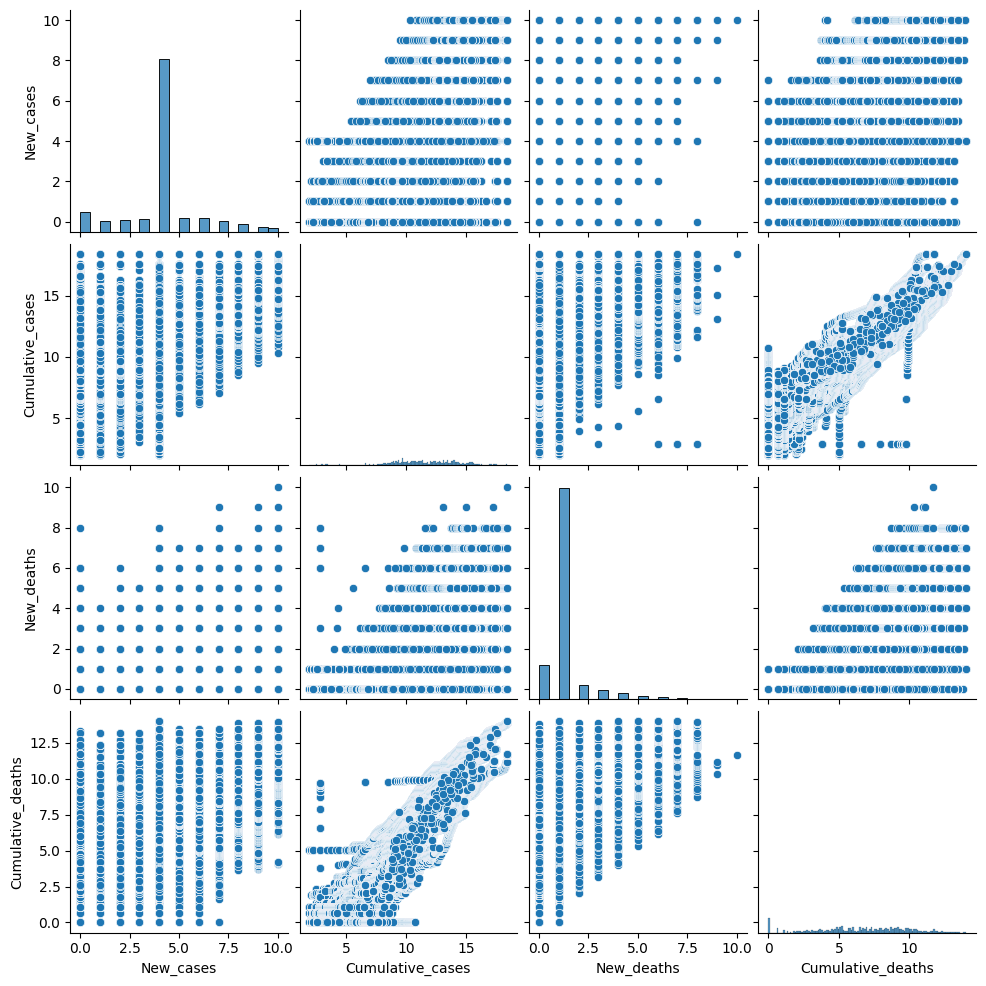

In [143]:
plt.figure(figsize=(20, 15))
sns.pairplot(df)
plt.show()

Text(0.5, 1.0, 'Distribution of Daily New Cases')

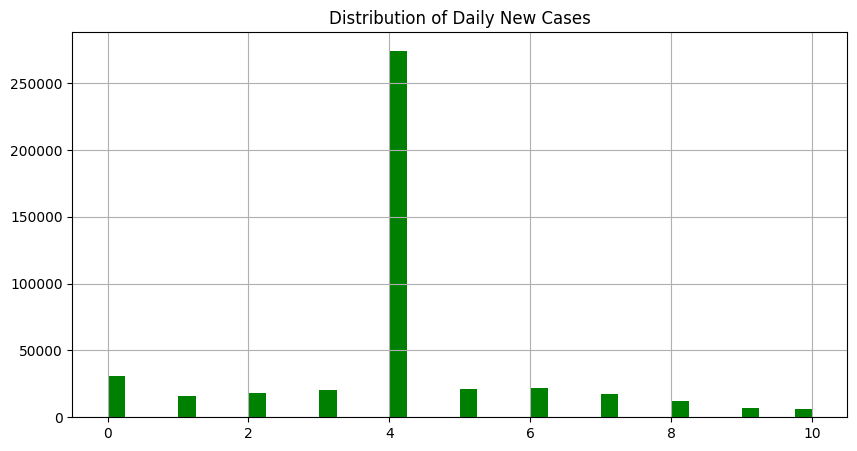

In [144]:
df["New_cases"].hist(bins=40, figsize=(10,5),color='green')
plt.title("Distribution of Daily New Cases")


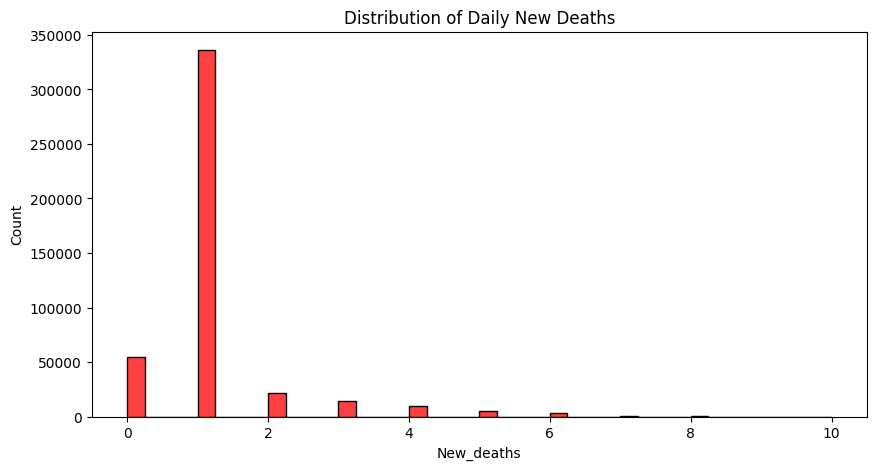

In [145]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="New_deaths", bins=40,color='red')
plt.title("Distribution of Daily New Deaths")
plt.show()

<Axes: title={'center': 'Total New Cases by WHO Region'}, ylabel='WHO_region'>

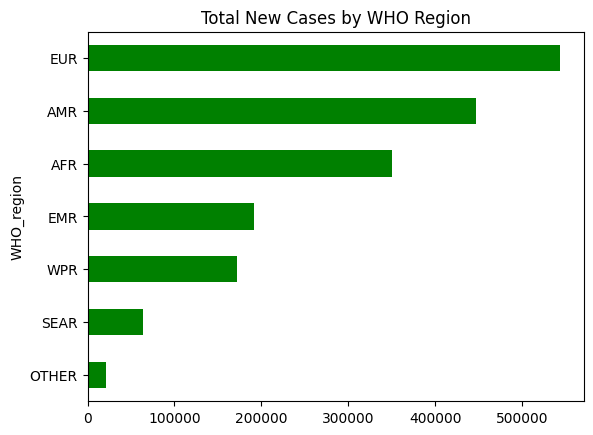

In [146]:
region_cases = df.groupby("WHO_region")["New_cases"].sum().sort_values()
region_cases.plot(kind="barh", title="Total New Cases by WHO Region",color='green')

<Axes: title={'center': 'Total New deaths by WHO Region'}, ylabel='WHO_region'>

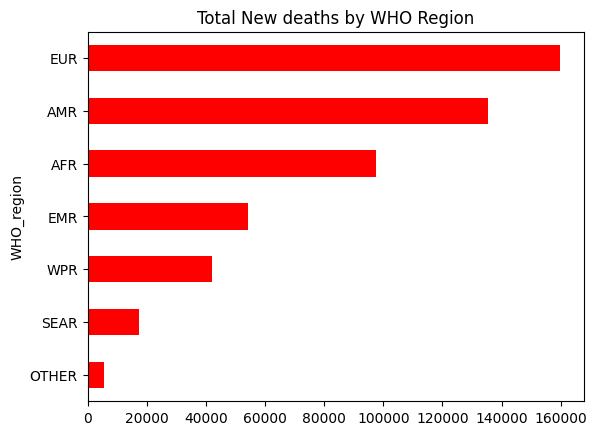

In [147]:
region_cases = df.groupby("WHO_region")["New_deaths"].sum().sort_values()
region_cases.plot(kind="barh", title="Total New deaths by WHO Region",color='red')

<Axes: title={'center': 'Top 10 Countries - Cases'}, xlabel='Country'>

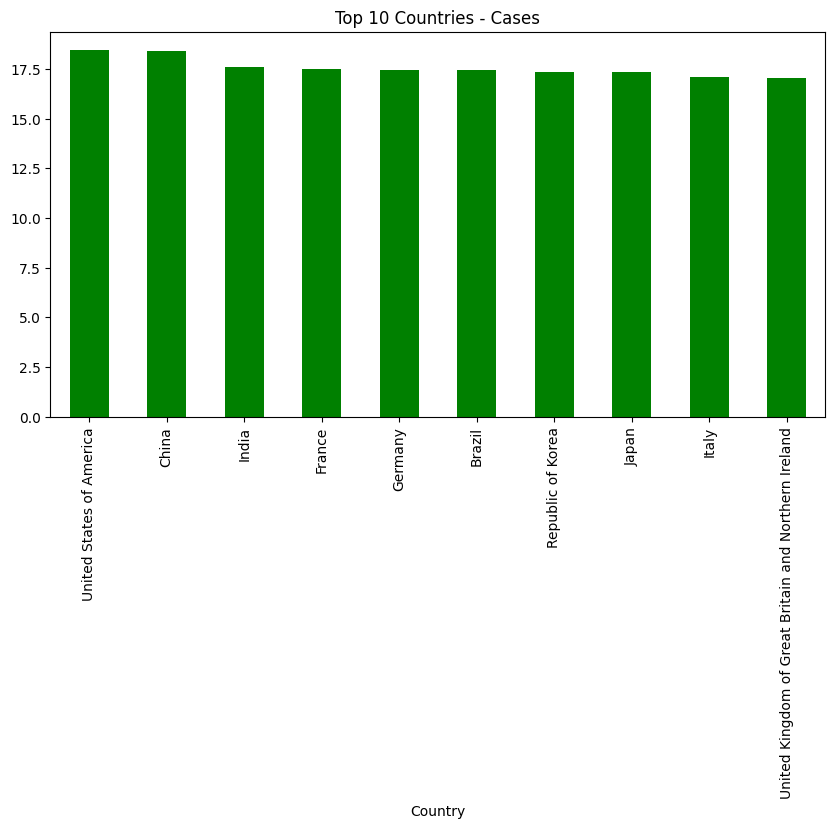

In [148]:
top_cases = df.groupby("Country")["Cumulative_cases"].max().sort_values(ascending=False).head(10)
top_cases.plot(kind="bar", title="Top 10 Countries - Cases",color="green", figsize=(10,5))



<Axes: title={'center': 'Top 10 Countries - Deaths'}, xlabel='Country'>

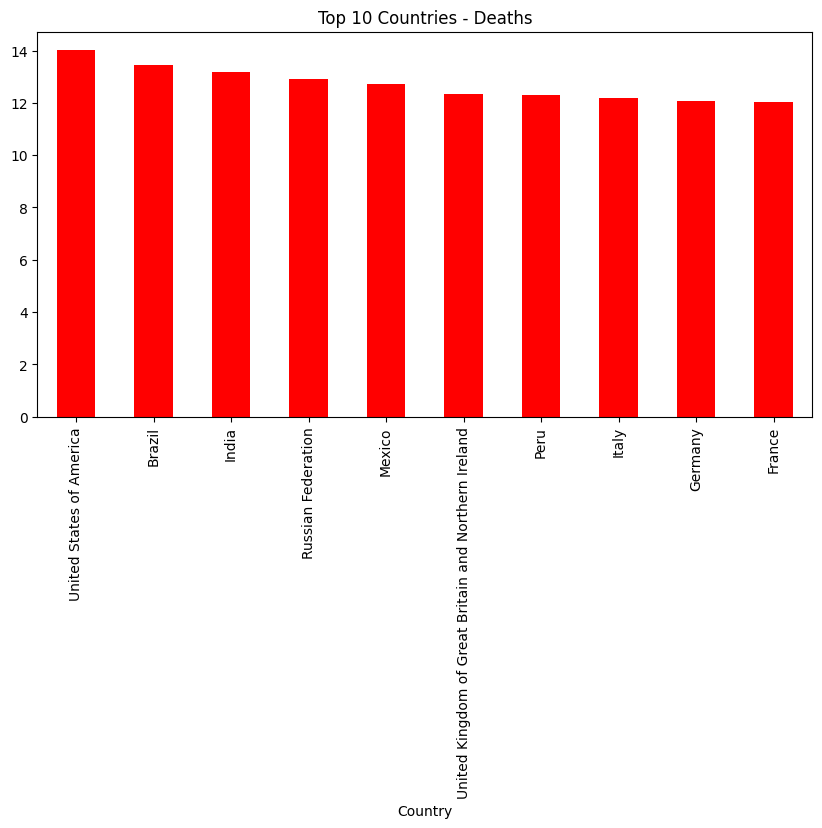

In [149]:
top_deaths = df.groupby("Country")["Cumulative_deaths"].max().sort_values(ascending=False).head(10)
top_deaths.plot(kind="bar", color="red", title="Top 10 Countries - Deaths", figsize=(10,5))

<Axes: title={'center': 'Top 10 Countries by Case Fatality Rate'}, xlabel='Country'>

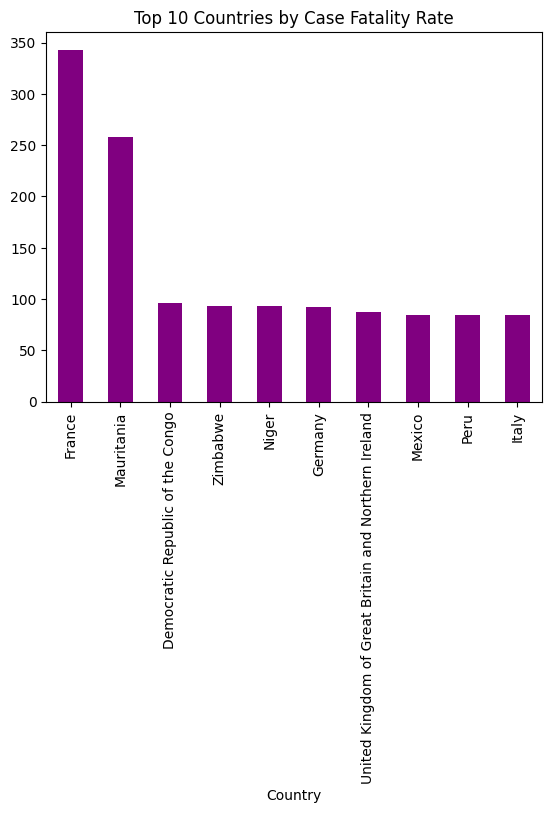

In [150]:
df["CFR"] = (df["Cumulative_deaths"] / df["Cumulative_cases"]) * 100
cfr = df.groupby("Country")["CFR"].max().sort_values(ascending=False).head(10)
cfr.plot(kind="bar", color="purple", title="Top 10 Countries by Case Fatality Rate")

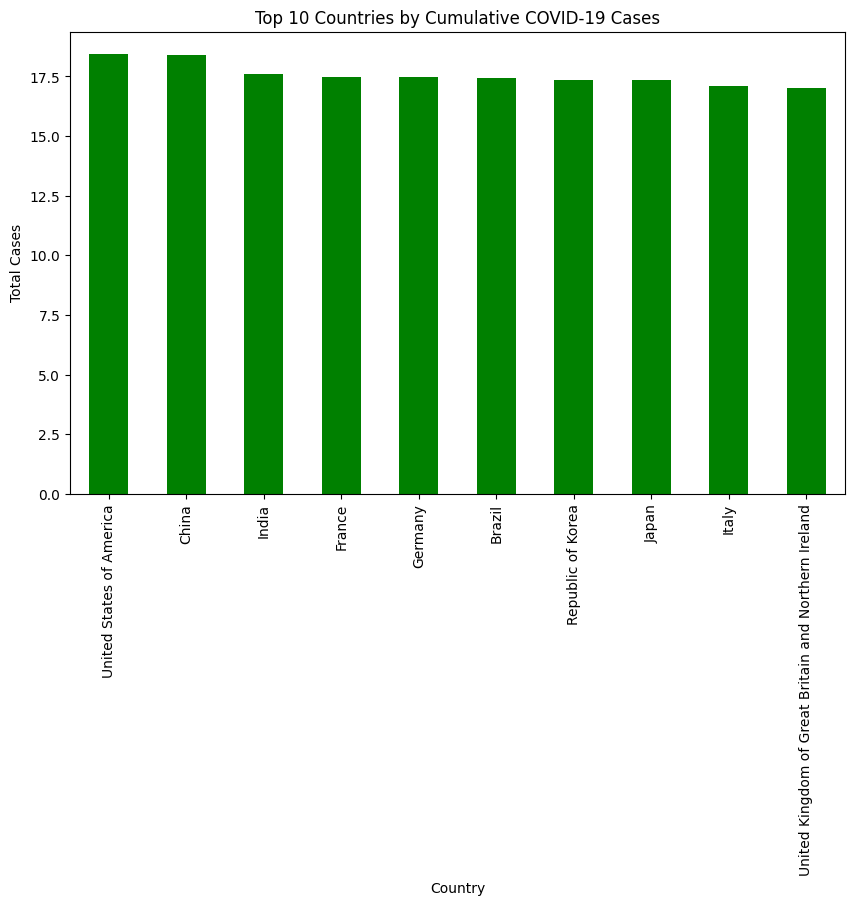

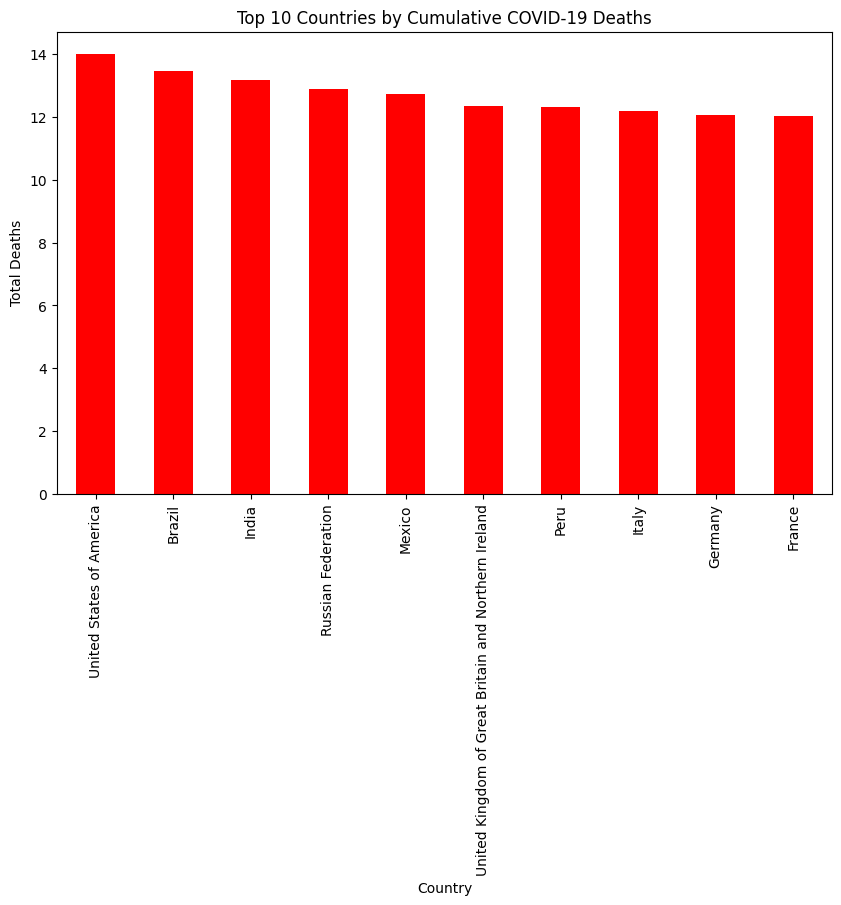

In [151]:


# Top 10 countries by cumulative cases
top_cases = df.groupby("Country")["Cumulative_cases"].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_cases.plot(kind="bar", color="green")
plt.title("Top 10 Countries by Cumulative COVID-19 Cases")
plt.ylabel("Total Cases")
plt.xticks(rotation=90)
plt.show()

# Top 10 countries by cumulative deaths
top_deaths = df.groupby("Country")["Cumulative_deaths"].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_deaths.plot(kind="bar", color="red")
plt.title("Top 10 Countries by Cumulative COVID-19 Deaths")
plt.ylabel("Total Deaths")
plt.xticks(rotation=90)
plt.show()


## **Time Series Analysis**

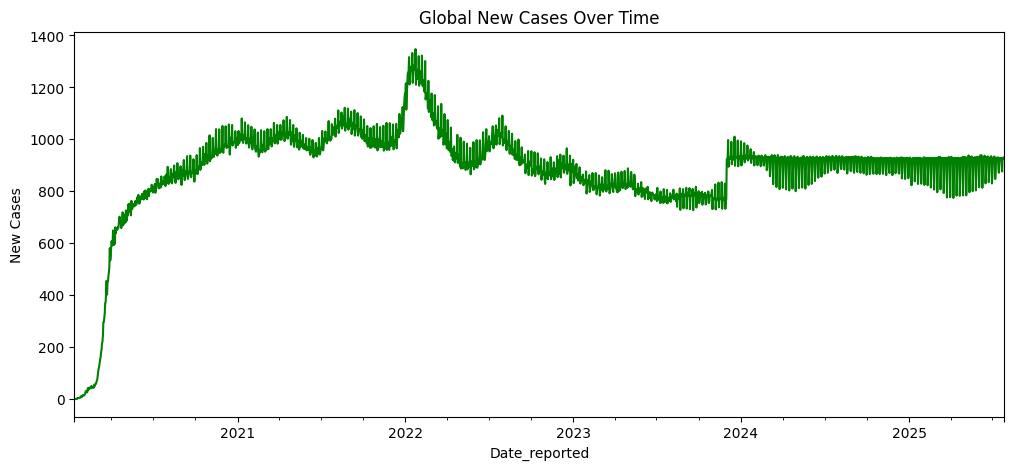

In [152]:
df.groupby("Date_reported")["New_cases"].sum().plot(figsize=(12,5), title="Global New Cases Over Time",color='green')
plt.ylabel("New Cases")
plt.show()

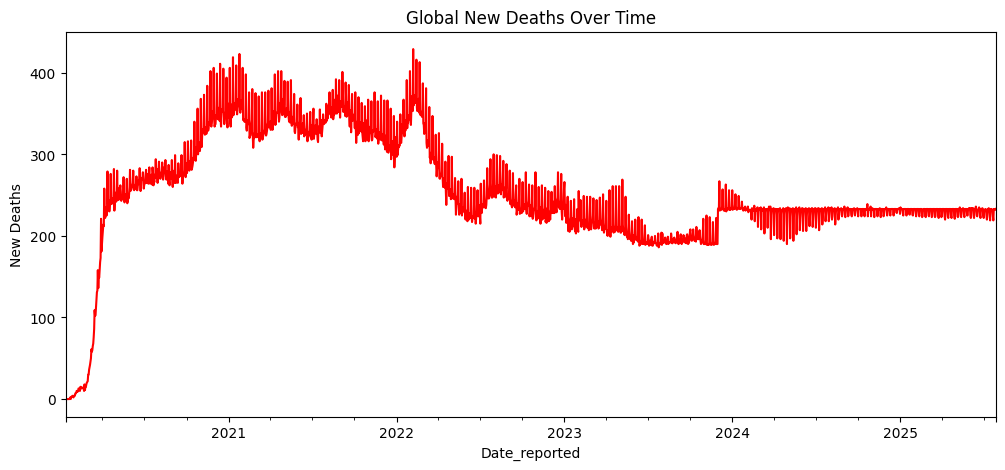

In [153]:


df.groupby("Date_reported")["New_deaths"].sum().plot(figsize=(12,5), title="Global New Deaths Over Time", color="red")
plt.ylabel("New Deaths")
plt.show()


<Axes: title={'center': 'Monthly Cases by Region'}, xlabel='Month'>

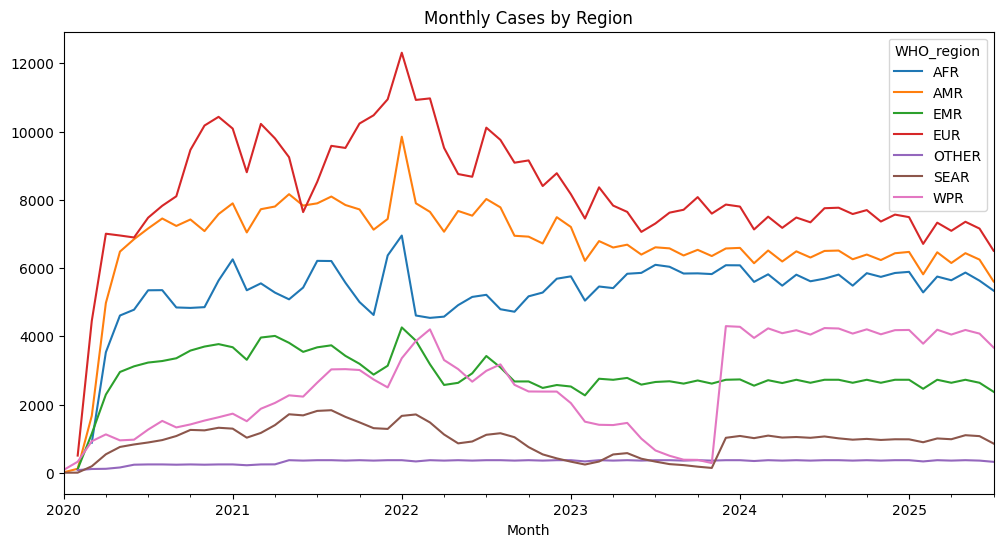

In [154]:
df["Month"] = df["Date_reported"].dt.to_period('M')
monthly_region = df.groupby(["Month", "WHO_region"])["New_cases"].sum().unstack()
monthly_region.plot(kind="line", figsize=(12,6), title="Monthly Cases by Region")

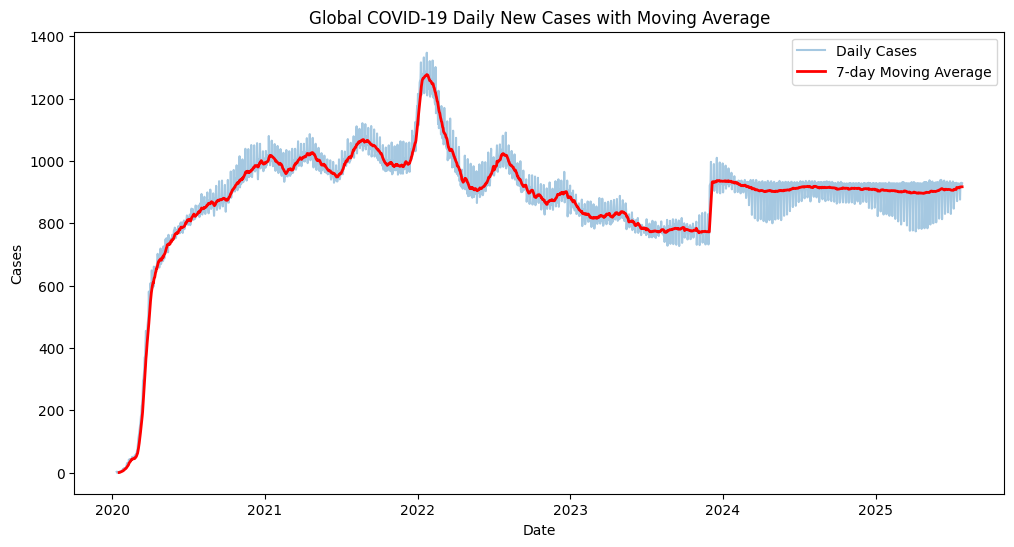

In [155]:

df["Date_reported"] = pd.to_datetime(df["Date_reported"])

# Aggregate global daily cases
global_cases = df.groupby("Date_reported")["New_cases"].sum()

# 7-day moving average
global_cases_ma = global_cases.rolling(window=7).mean()

plt.figure(figsize=(12,6))
plt.plot(global_cases, label="Daily Cases", alpha=0.4)
plt.plot(global_cases_ma, label="7-day Moving Average", color="red", linewidth=2)
plt.title("Global COVID-19 Daily New Cases with Moving Average")
plt.ylabel("Cases")
plt.xlabel("Date")
plt.legend()
plt.show()


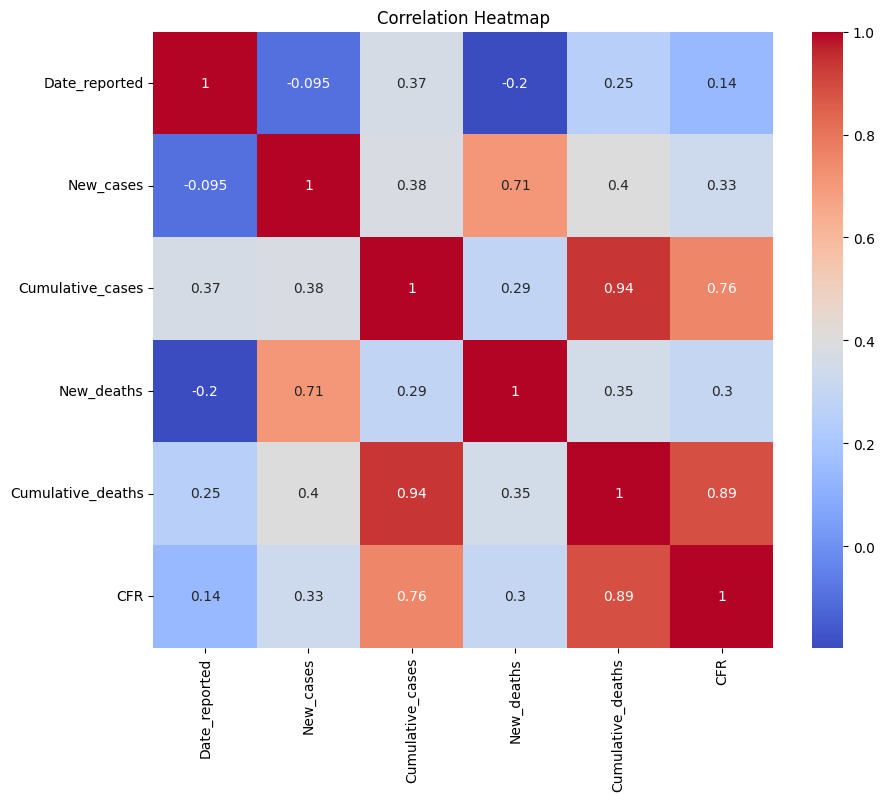

In [156]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=['Country_code', 'Country', 'WHO_region', 'Month']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [157]:
import plotly.express as px
import plotly.io as pio

# Best renderer for Colab
pio.renderers.default = "colab"

# Get latest snapshot
latest_date = df["Date_reported"].max()
latest_df = df[df["Date_reported"] == latest_date]

# Choropleth using ISO country codes
fig_cases = px.choropleth(
    latest_df,
    locations="Country_code",        # Must be ISO-3 codes
    color="Cumulative_cases",
    hover_name="Country",
    color_continuous_scale="Reds",
    projection="natural earth",
    title=f"Global COVID-19 Cumulative Cases as of {latest_date.date()}"
)
fig_cases.show()

# Choropleth using country names (alternative)
fig_cases_names = px.choropleth(
    latest_df,
    locations="Country",
    locationmode="country names",
    color="Cumulative_cases",
    hover_name="Country",
    color_continuous_scale="Reds",
    projection="natural earth",
    title=f"Global COVID-19 Cumulative Cases as of {latest_date.date()}"
)
fig_cases_names.show()





In [158]:
df.to_csv("cleanedCovid19.csv", index=False)

from google.colab import files
files.download("cleanedCovid19.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Analysis Summary:**




- **Global Growth:** COVID-19 cases and deaths increased exponentially in waves, with clear peaks around late 2020, mid-2021, and early 2022.  

- **Lag Effect:** Death spikes consistently lagged behind case spikes, reflecting the typical disease progression timeline.  

- **Regional Burden:**  
  - AMR (Americas) and EUR (Europe) carried the highest case and death counts.  
  - AFR (Africa) reported relatively fewer cases, but likely suffered from underreporting.  

- **Country Concentration:** A small set of countries (e.g., **USA, India, Brazil, Russia**) contributed disproportionately to global totals.  

- **Case Fatality Rate (CFR):** Globally estimated at **~2–3%**, but significantly higher in regions with weaker healthcare systems.  

- **Trend Stability:** Moving averages revealed multiple pandemic waves, highlighting the need to monitor rolling averages instead of raw daily counts.  

- **Correlation:** A strong positive relationship was found between **new cases and new deaths**, confirming that spikes in cases predict increased strain on healthcare systems.  

---

###  Conclusion  
The analysis shows that while COVID-19 spread globally in multiple waves, its **impact was uneven across regions and countries**. Local healthcare capacity, testing, and reporting strongly influenced fatality rates and case visibility. These findings stress the importance of **localized strategies and preparedness** in managing global health crises.  
